# Wurfbewegung
### Aufgabenstellung

Ein Ball soll vom Punkt $P_0(x_0 = 0; y_0 = h)$ aus unter einem Winkel $\alpha_0$ zur Horizontalen schräg nach oben geworfen werden.
1. Stellen Sie die Bahngleichung y(x) auf!
2. Zeigen Sie nun die Abhängikeit der Wurfhöhe $w_h$, der Wurfweite $w_w$ und der Geschwindigkeit $v$ von der Zeit $t$.

### Gegeben
- Anfangsgeschwindigkeit $v_0 = 50 \,\frac{m}{s}$
- Abwurfwinkel $\alpha = 50°$
- Anfangshöhe $h = 1,80 \,m$

### Gesucht
- Abhängigkeit der Wurfhöhe $w_h$ von der Wurfweite $w_w$: $w_h(w_w)$
- Abhängikeit der a) Wurfweite $w_w$ b) Wurfhöhe $w_h$ c) Geschwindigkeit $v$ von der Zeit $t$

### Skizze
![title](Skizzen/Skizze_Wurf.png)

### Physikalischer Lösungsweg

Die Abhängigkeit der Wurfhöhe $w_h$ von der Wurfweite $w_w$ ergibt die Flugparabel $w_h(w_w)$ mit:

$w_h(w_w) = -\frac{1}{2} \cdot \frac{g}{(v_0 \cdot cos(\alpha_0))^2} \cdot w_w^2 + tan(\alpha_0) \cdot w_w + h$

Wenn nun die Zeit als Parameter eingeführt wird, können $w_w$, $w_h$ und $v$ der Bewegung bestimmt werden:

$w_w(t) = v_0 \cdot t \cdot cos(\alpha_0)$

$w_h(t) = - \frac{g}{2} \cdot t^2 + v_0 \cdot t \cdot sin(\alpha_0)$

$v(t) = \sqrt{v_0^2 + g^2 \cdot t^2 - (2 \cdot v_0 \cdot g \cdot t \cdot sin(\alpha_0))}$

### Implemetierung in Python
Die oben dargestellten Abhängigkeiten können nun in der Programmiersprache Python beschrieben und anschließend graphisch dargestellt werden.

Als Erstes werden die benötigten Bibliotheken importiert:

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import cm
import pandas as pd

Nun werden die benötigten Funktionen, welche im physikalischen Lösungsansatz beschrieben wurden in die Programmiersyntax überführt. Die Variablen wie $v_0$, $\alpha_0$ und $h$ werden außerhalb der Funktionen definiert. Es ist auch möglich diese Parameter als Funktionsparameter analog zu "t" oder "w_w" den Funktionen zu übergeben. Das hätte den Vorteil, dass man diese Parameter für jeden Funktionsaufruf verändern könnte. Für dieses Beispiel werden die Parameter global für alle Funktionen als Variablen definiert und nicht der Funktion übergeben.

In [2]:
def w_h_von_w_w(w_w):
    return -0.5 * (g / (v0 * math.cos(math.radians(alpha)) )**2) * w_w**2 + math.tan(math.radians(alpha)) * w_w + h

def w_w_von_t(t):
    return v0 * t * math.cos(math.radians(alpha))

def w_h_von_t(t):
    return ((-g/2) * (t**2)) + (v0 * t * math.sin(math.radians(alpha))) 

def v_von_t(t):
    return ((v0**2) + (g**2 * t**2) - (2*v0 * g * t * math.sin(math.radians(alpha))))**0.5

Anschließend werden Vektoren für die Wurfweite $w_w$ und für die Zeit $t$ erstellt.

In [3]:
# Erstellen eines Vektors von Schritten der Wurfweite
w_w = np.arange(0, 300, 1)

# Erstellen eines Vektors mit Zeitschritten
Zeitschritte = np.arange(0, 10.1, 0.1)

Hier werden die gegebenen Parameter als globale Variablen definiert.

In [4]:
# Definition der Variablen
g = 9.806 # m/s^2
v0 = 50 # m/s
alpha = 50 #°
h = 1.8 #m

### Graphische Darstellung der Abhängigkeiten

1. Visualisierung der Bahnkurve $w_h(w_w)$

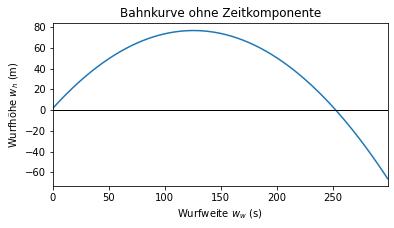

In [5]:
plt.style.use({'figure.facecolor':'white'})
plt.figure(num=None, figsize=(6, 3), facecolor='w', edgecolor='k')

# Plot: Visualisierung der Wurfweiten (w_w) und der daraus berechneten Wurfhöhen w_h_von_w_w
plt.plot(w_w, w_h_von_w_w(w_w))
plt.ylabel("Wurfhöhe $\mathit{w_h}$ (m)")
plt.xlabel("Wurfweite $\mathit{w_w}$ (s)")
plt.axhline(y=0.0, color = 'black', linewidth=1.0)
plt.title("Bahnkurve ohne Zeitkomponente")
plt.xlim([min(w_w),max(w_w)])
plt.show()

2. Visualisierung der Abhängikeit der Wurfhöhe $w_h$, der Wurfweite $w_w$ und der Geschwindigkeit $v$ von der Zeit $t$

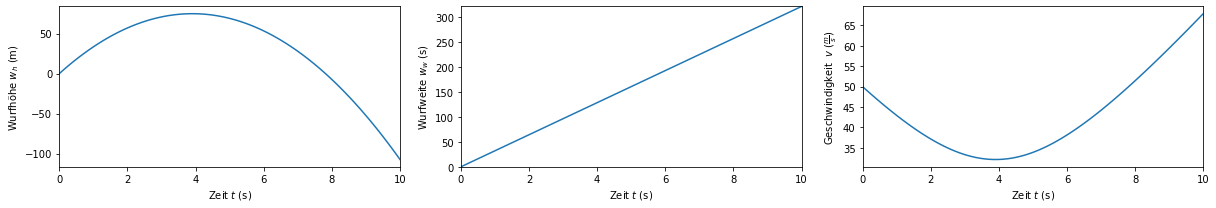

In [6]:
fig, axs = plt.subplots(1, 3, figsize=(17,3))

# Plot 1: Visualisierung der Wurfhöhe w_h_von_t (Y-Achse) in Abhängigkeit der Zeit t (X-Achse)
axs[0].plot(Zeitschritte, w_h_von_t(Zeitschritte))
axs[0].set_ylabel("Wurfhöhe $\mathit{w_h}$ (m)") 
axs[0].set_xlabel("Zeit $\mathit{t}$ (s)")
axs[0].set_xlim([min(Zeitschritte),max(Zeitschritte)])

# Plot 2: Visualisierung der Wurfweite w_w_von_t (Y-Achse) in Abhängigkeit der Zeit t (X-Achse)
axs[1].plot(Zeitschritte, w_w_von_t(Zeitschritte))
axs[1].set_ylabel("Wurfweite $\mathit{w_w}$ (s)") 
axs[1].set_xlabel("Zeit $\mathit{t}$ (s)")
axs[1].set_xlim([min(Zeitschritte),max(Zeitschritte)])
axs[1].set_ylim([min(w_w_von_t(Zeitschritte)),max(w_w_von_t(Zeitschritte))])

# Plot 3: Visualisierung der Geschwindigkeit v_von_t (Y-Achse) in Abhängigkeit der Zeit t (X-Achse)
axs[2].plot(Zeitschritte, v_von_t(Zeitschritte))
axs[2].set_ylabel("Geschwindigkeit  $\mathit{v}$ " + r'($\frac{m}{s}$)') 
axs[2].set_xlabel("Zeit $\mathit{t}$ (s)")
axs[2].set_xlim([min(Zeitschritte),max(Zeitschritte)])

plt.tight_layout()
plt.show()

### Graphische Darstellung unter Variation der Anfangsbedingung $\alpha_0$
Nun können die Anfangswinkel $\alpha_0$ verändert werden und dabei die Veränderung der Wurfparabel visualisiert werden. Es wurden die Wurfhöhe $w_h$ und Wurfweite $w_w$ in Abhängigkeit der Zeit $t$ bestimmt. Die Anfangsgeschwindigkeit $v_0$ wurde, für eine bessere Darstellung, auf 15 $\frac{m}{s}$ reduziert.

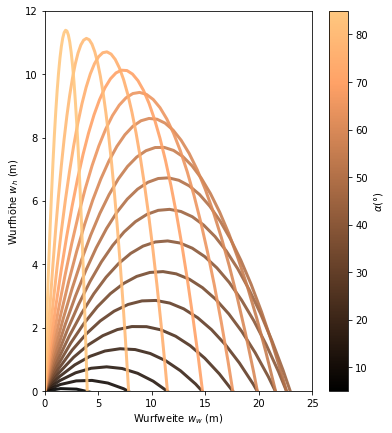

In [7]:
# Erstellen eines Vektors mit alpha-Winkeln
alpha_vector = np.arange(5, 90, 5)

# Initialisieren eines Vectors
data = []
# Alle Daten werden mittels der Schleife in diese Liste geschrieben
for alpha in alpha_vector:
    for t in Zeitschritte:
        v0 = 15
        x = w_w_von_t(t)
        y = w_h_von_t(t)
        data.append([alpha, x, y])

# Konvertierung der erstellten Liste in ein DataFrame 
df = pd.DataFrame(data, columns=['alpha', 'w_w', 'w_h'])

# Visualisierung
f, ax = plt.subplots(1, 1,figsize=(6, 7))
a = df.alpha.unique()

# Definition der Farbpalette 
normalize = mcolors.Normalize(vmin=a.min(), vmax=a.max())
colormap = cm.copper
num=-1
for i in a:
    num+=1
    filtered_df = df[df.alpha == i]
    ax.plot(filtered_df.w_w, filtered_df.w_h, color=colormap(normalize(i)), linewidth=3, alpha=0.9, label=str(i)+'°')
    ax.set_ylim([0,12])
    ax.set_xlim([0,25])
plt.xlabel("Wurfweite $\mathit{w_w}$ (m)")
plt.ylabel("Wurfhöhe $\mathit{w_h}$ (m)")

# Legende
scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array(a)
cbar = plt.colorbar(scalarmappaple)
cbar.set_label(r'$\alpha (°)$')
